<a href="https://colab.research.google.com/github/JoanNjoki/East-Africa-Financial-Inclusion-Data-Analysis/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_04_Joan_Mwangi_Python_Notebookipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Financial Inclusion in East Africa Data Analysis



### a) Specifying the Data Analytic Question

Financial Inclusion has hindered economic and human development in Africa despite the proliferation of mobile money.
As a data analyst, my task is to identify the type of individuals who have or can access a bank account

### b) Defining the Metric for Success

Metric for success is creating association(s) with values within the dataset to having a bank account

### c) Understanding the context 

In East Africa, only 9.1 million(13%) people have access to a bank account yet it is essential in paying utility bills, savings, getting access to loans based on the credit scores, and improving financial access which ultimately leads to long term economic growth. Based on this information, I'll map individuals who are highly likely to have access to bank accounts based on 
a dataset  collected from Finscope Survey from 2016 and 2018.


### d) Recording the Experimental Design

 The experimental design will be as follows:
1. Loading the libraries and dataset into the environment.
2.Tidying the dataset
3. Performing univariate, bivariate, and multivariate analysis
4. Recommendations and conclusions

### e) Data Relevance

In [ ]:
#previewing data from finscope to see if the data is relevant
finscope_tz = pd.read_csv('/content/FinScope Tanzania 2017_27092017.csv')
finscope_tz.head(2)
#identified that the Financial dataset provided is relevant as columns names relate to the Finscope Tanzania dataset 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,688,689,1209) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SbjNum,Region,Region_Code,District,District_Code,Ward,Ward_Code,Village_Code,EA,UEA_Code,EA_Code,Block,Block_SN,UHH_SN,Cluster,A4,A6,A7,Consent,Refusal,B1,B1a_1,B1b_1,B1c_1,B1a_2,B1b_2,B1c_2,B1a_3,B1b_3,B1c_3,B1a_4,B1b_4,B1c_4,B1a_5,B1b_5,B1c_5,B1a_6,B1b_6,B1c_6,B1a_7,...,KH16_4,KH16_5,KH16_6,KH16_7,KH16_8,KH16_9,KH16_10,KH16_11,KH16_12,KH16_13,KH16_14,KH16_15,KH16_16,KH16_17,KH16_18,KH16_19,End_Time,Final_weight,Banked,Other_formal,Formal,Informal,MM,MFI,Pension,Insurance,SACCO,Capitalm,SG,Shylock,PPIScore,PPI_Category,IncomeMain,BusO,Farmers,RU,MZ,fasx,overlapx,tot
0,48475424,5,5,34,3,159,73,1,156,530,1317,4,7,8,2,1276,530,21,1,-1,1,55,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2,1,1,2,2,2,2,1,2,2,2,2,2,2,1,3:17:43,1130.014286,1,1,1,1,1,1,1,1,1,0,1,0,52,2,1,0,0,3,1,1,7,1
1,47118466,4,4,24,3,109,21,2,106,974,2005,3,1,7,1,156,486,34,1,-1,4,75,1,1,65,2,1,20,1,2,16,2,2,-1,-1,-1,-1,-1,-1,-1,...,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,1,21:38:09,2120.258802,0,1,1,1,1,0,0,1,0,0,1,0,49,2,6,1,0,3,1,2,6,1


## 2. Reading the Data

### 2.1 Importing the libraries

In [ ]:
#importing the libraries into the environmnet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 2.2 Loading the dataset into the environment

In [ ]:
#loading the variable definition and previewing the dataset
variable_definition = pd.read_csv('/content/VariableDefinitions (1).csv')
variable_definition

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#loading the dataset and previewing the first two rows
financial_df = pd.read_csv('/content/Financial Dataset.csv')
financial_df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
#identifying the number of records within the dataset
financial_df.shape

(23524, 13)

# 3. Checking the Data

### 3.1 Identifying duplicates

In [ ]:
#identifying duplicated values
#in this case, there are 0 duplicated values
financial_df.duplicated().sum()

0

### 3.2 Previewing the column names

In [ ]:
#identifying the column names
financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

### 3.3 Previewing the data types of the dataset

In [ ]:
#identifying the data types of the dataset
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 4. Tidying the Dataset






## 4.1 Univariate analysis

### 4.1.1 Boxplots

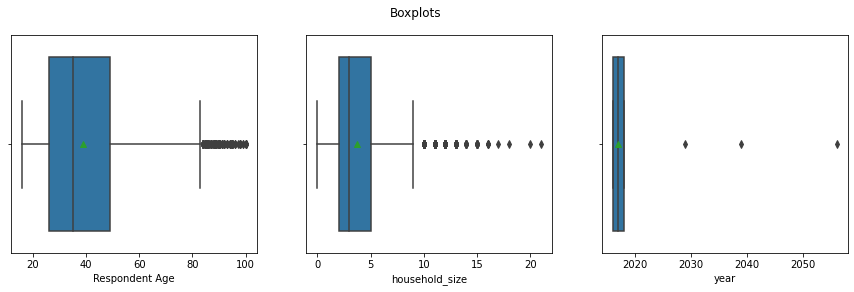

In [ ]:
#plotting the boxplots to identify outliers
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15, 4))
fig.suptitle('Boxplots')
sns.boxplot(data=financial_df,x=financial_df['Respondent Age'],ax=ax1, showmeans = True)
sns.boxplot(data=financial_df,x=financial_df['household_size'],ax=ax2, showmeans = True)
sns.boxplot(data=financial_df,x=financial_df['year'],ax=ax3, showmeans = True)

### 4.1.2. Histograms

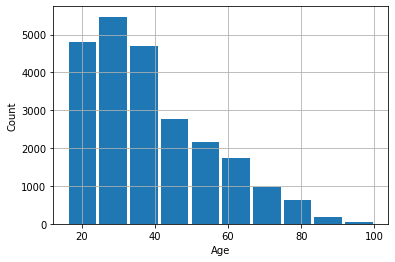

In [ ]:
#viewing the data using histogram to identify anomalies, and skewness
respondent_age =financial_df['Respondent Age']
plt.hist(respondent_age,bins=10,histtype='bar',rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

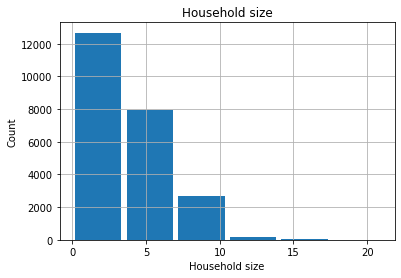

In [ ]:
#Action: plotting a histogram of household size
#Reason:to see if there are outliers and anomalies within the dataset
household_size = financial_df['household_size']

plt.hist(household_size,bins=6,histtype='bar',rwidth=0.9)
plt.title('Household size')
plt.xlabel('Household size')
plt.ylabel('Count')
plt.grid()
plt.show()

### 4.1.3 Stacked Column Charts

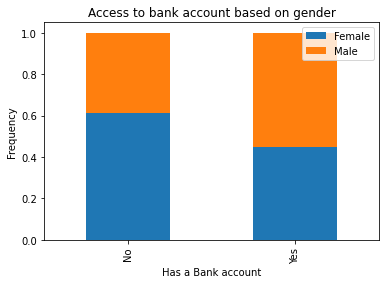

In [ ]:
#Identifying gender that is most likely to have access to bank account
gender_bar = financial_df.groupby('Has a Bank account')['gender_of_respondent'].value_counts(normalize=True).unstack()
gender_bar.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Placing the color on the upper right corner of the chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Access to bank account based on gender")

# Displaying our chart
plt.show()
#according to the stacked column chart, Males are more likely than females to have access to bank accounts


###4.1.4 Dealing with outliers

In [ ]:
#Action:replacing the years with 2018, and 2016 identified in the outliers
#Reason:since the year corresponds to the countries 
financial_df.replace({'year': {2056: 2018}}, inplace= True)
financial_df.replace({'year': {2029: 2018}}, inplace= True)
financial_df.replace({'year': {2039: 2016}}, inplace= True)

 ###4.1.5 Identifying the missing values

In [ ]:
#Action: identifying columns with null values within the records
financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#Action:-:removing the column names by using the header=None
#assigning to a new dataframe, so that it doesnt affect the original(financial_df)
#Reason:-identifying values whose columns have 0 as their null values
df = pd.read_csv('/content/Financial Dataset.csv',header = None)
df.head(2)
(df[[0,1,2,3,4,5,6,7,8,9,10,11,12]]== 0).sum().sum()


0

###4.1.5 Measures of Central Tendency 

In [ ]:
#Action:identifying the measures of central tendency for the numerical columns:year,household size and respondent age
#Explanation: to identify the anomalies and outliers within the dataset
financial_df.describe()



,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
#variance of the numerical values
print(financial_df.var())

year                0.809405
household_size      5.198096
Respondent Age    272.910271
dtype: float64


In [ ]:
#range of year column
range_hhold = financial_df['household_size'].max()-financial_df['household_size'].min()
print(range_hhold)
range_age = financial_df['Respondent Age'].max()-financial_df['Respondent Age'].min()
print(range_age)

21.0
84.0


From the descriptive statistics we can deduce the following:

1.   The age column has a range of 84, with a standard deviation of +/-16.51,variance of 272.91, a mean of 38.8, with values ranging from 16,26,35,49,100.
2. The household column has a range of 21, with a standard deviation of
 +/-2.28 and variance of 5.198, a mean of 38.8, with a quartile range(0,25%,50%,75%,100%) of 0,2,3,5, and 21



### 4.1.6 Measures of dispersion

In [ ]:
#using skewness to identify the distribution
print(financial_df.skew())
#skewness are all positive values
#Meaning:numerical columns are positively skewed to the right

#**************************************

# year and household size are leptokurtic,heavily tailed indicating large outliers
#respondent age is mesokurtic, it follows a normal distribution
print(financial_df.kurt())

year              0.045664
household_size    0.977652
Respondent Age    0.841801
dtype: float64
year             -1.605870
household_size    1.158154
Respondent Age    0.101108
dtype: float64


### 4.1.7 Dealing with missing values

In [ ]:
#Action: filling the null values with forward fill and backward fill
#since they are categorical variables
financial_df.country=financial_df['country'].fillna(method = 'ffill')
financial_df.country=financial_df['Has a Bank account'].fillna(method = 'ffill')
financial_df.country=financial_df['gender_of_respondent'].fillna(method = 'ffill')
financial_df.country=financial_df['Cell Phone Access'].fillna(method = 'ffill')
financial_df.country=financial_df['Type of Location'].fillna(method = 'ffill')
financial_df.country=financial_df['The relathip with head'].fillna(method = 'ffill')
financial_df.country=financial_df['marital_status'].fillna(method = 'ffill')
financial_df.country=financial_df['Level of Educuation'].fillna(method = 'ffill')
financial_df.country=financial_df['Type of Job'].fillna(method = 'ffill')

#filling the null values with backward fill
financial_df.country=financial_df['country'].fillna(method = 'bfill')
financial_df.country=financial_df['Has a Bank account'].fillna(method = 'bfill')
financial_df.country=financial_df['gender_of_respondent'].fillna(method = 'bfill')
financial_df.country=financial_df['Cell Phone Access'].fillna(method = 'bfill')
financial_df.country=financial_df['Type of Location'].fillna(method = 'bfill')
financial_df.country=financial_df['The relathip with head'].fillna(method = 'bfill')
financial_df.country=financial_df['Level of Educuation'].fillna(method = 'bfill')
financial_df.country=financial_df['Type of Job'].fillna(method = 'bfill')


In [ ]:
#Action:filling missing values with mode
#Explanation:as it will not affect the measures of central tendency and it will insert integer values into the missing entries
financial_df.household_size=financial_df['household_size'].fillna(value=financial_df['household_size'].mode())
financial_df['respondent_age']=financial_df['respondent_age'].fillna(value=financial_df['respondent_age'].mode())
 

In [ ]:
#Action:dropping the columns 'uniqueid'
#Explanation:it will not be necessary for our analysis
financial_df = financial_df.drop('uniqueid',1)
financial_df.head(0)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,r/ship_with_head,marital_status,level_of_education,type_of_job


In [ ]:
#identifying the null values
#confirming if the null values have been filled
#in this case not all values have been filled
financial_df.isnull().sum()

country                    0
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

###4.1.8 Checking for anomalies

In [ ]:
#identifying the unique values in cell phone access
print(financial_df['Cell Phone Access'].unique())
print(financial_df['Has a Bank account'].unique())
print(financial_df['country'].unique())
print(financial_df['gender_of_respondent'].unique())
print(financial_df['year'].unique())
print(financial_df['household_size'].unique())
print(financial_df['Type of Location'].unique())
print(financial_df['gender_of_respondent'].unique())
print(financial_df['The relathip with head'].unique())
print(financial_df['marital_status'].unique())
print(financial_df['Level of Educuation'].unique())
print(financial_df['Type of Job'].unique())

['Yes' 'No' nan]
['Yes' 'No' nan]
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']
['Female' 'Male' nan]
[2018 2016 2017]
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
['Rural' 'Urban' nan]
['Female' 'Male' nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' nan 'No I

In [ ]:
#replacing the anomaly within the level of education column 6 and assigning -->> with Other/Dont know/RTA
#to avoid confusion when the values are converted to numerical values
financial_df.replace(to_replace={'level_of_educuation': {6 : 'Other/Dont know/RTA'}}, inplace= True)

In [ ]:
#lowering the case of the column names 
financial_df.columns = financial_df.columns.str.replace(' ','_').str.lower()
#renaming the column names 
financial_df.rename({'the_relathip_with_head':'r/ship_with_head'},axis = 1,inplace=True)
financial_df.rename({'level_of_educuation':'level_of_education'},axis = 1,inplace=True)
financial_df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'r/ship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [ ]:
#filling the remaining null values with mode
financial_df = financial_df.fillna(financial_df.mode().iloc[0])

In [ ]:
#viewing if there are null values
financial_df.isnull().sum().sum()

0

# 5. Exploratory Analysis

## 5.1  Bivariate Analysis

#### 5.1.1 Scatter plots

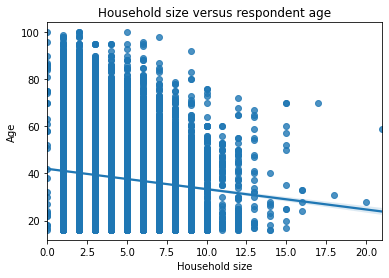

In [ ]:
#using regression plot to identify the relationship between the two numerical variable
sns.regplot(x = financial_df['household_size'], y =financial_df['respondent_age'])
plt.title('Household size versus respondent age')
plt.ylabel('Age')
plt.xlabel('Household size')
plt.show()
#There is a weak relationship between size of the household and the respondent's age

#### 5.1.2 Pearson correlation coefficient

In [ ]:
pearson_coeff = financial_df['respondent_age'].corr(financial_df['household_size'])
print(pearson_coeff)
#since the coefficient is (-0.12) this means that the respondent's age and household size
#are weakly correlated

-0.1192115221214652


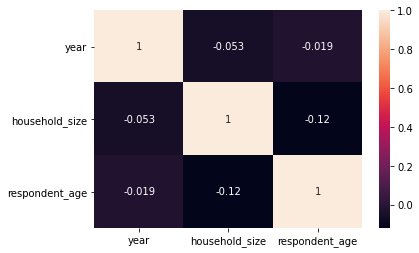

In [ ]:
#visualizing the correlation using a heatmap
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

#### 5.1.3 Line graphs

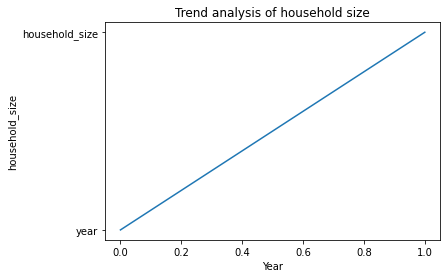

In [ ]:
#plotting a trend analysis for household size
#based on the results there is an upward increase of household size from 2016 to 2018
plt.plot(['year','household_size'])
plt.title('Trend analysis of household size')
plt.xlabel('Year')
plt.ylabel('household_size')
plt.show()

 Replacing the values within columns with numerical values in preparation for machine learning algorithms

In [ ]:
#changing the 'Yes' and 'No' values to 0s and 1
#Where yes is 1 and no is 0
financial_df = financial_df.replace(to_replace ='Yes',value=1)
financial_df = financial_df.replace(to_replace ='No',value=0)

In [ ]:
#changing the variables in the Countries column
financial_df = financial_df.replace(to_replace ='Kenya',value=1)
financial_df = financial_df.replace(to_replace ='Rwanda',value=2)
financial_df = financial_df.replace(to_replace ='Uganda',value=3)
financial_df = financial_df.replace(to_replace ='Tanzania',value=4)

In [ ]:
#changing the values in the location column
financial_df = financial_df.replace(to_replace ='Urban',value=0)
financial_df = financial_df.replace(to_replace ='Rural',value=1)


In [ ]:
#changing the values in the gender column
financial_df = financial_df.replace(to_replace ='Female',value=0)
financial_df = financial_df.replace(to_replace ='Male',value=1)

In [ ]:
financial_df['cell_phone_access'].unique()

array([1., 0.])

In [ ]:
#changing the variables in the Head of the household column
financial_df = financial_df.replace(to_replace ='Head of Household',value= 5)
financial_df = financial_df.replace(to_replace ='Spouse',value = 4)
financial_df = financial_df.replace(to_replace ='Child',value=3)
financial_df = financial_df.replace(to_replace ='Parent',value=2)
financial_df = financial_df.replace(to_replace ='Other relative',value=1)
financial_df = financial_df.replace(to_replace ='Other non-relatives',value=0)


In [ ]:
#changing the values in the marital status column
financial_df = financial_df.replace(to_replace ='Married/Living together',value= 5)
financial_df = financial_df.replace(to_replace ='Together',value=4)
financial_df = financial_df.replace(to_replace ='Widowed',value=3)
financial_df = financial_df.replace(to_replace ='Divorced/Seperated',value=2)
financial_df = financial_df.replace(to_replace ='Single/Never Married',value=1)
financial_df = financial_df.replace(to_replace ='Dont know',value=0)

In [ ]:
#changing the level of education  to numerical values
financial_df = financial_df.replace(to_replace ='Other/Dont know/RTA',value= 0)
financial_df = financial_df.replace(to_replace ='6',value=0)
financial_df = financial_df.replace(to_replace ='No formal education',value=1)
financial_df = financial_df.replace(to_replace ='Primary education',value=2)
financial_df = financial_df.replace(to_replace ='Secondary education',value=3)
financial_df = financial_df.replace(to_replace ='Vocational/Specialised training',value=4)
financial_df = financial_df.replace(to_replace ='Tertiary education',value=5)

In [ ]:
#changing the Type of job columns to numerical values
financial_df = financial_df.replace(to_replace ='Dont Know/Refuse to answer',value= 0)
financial_df = financial_df.replace(to_replace ='No Income',value= 1)
financial_df = financial_df.replace(to_replace ='Remittance Dependent',value=2)
financial_df = financial_df.replace(to_replace ='Government Dependent',value=3)
financial_df = financial_df.replace(to_replace ='Other Income',value=4)
financial_df = financial_df.replace(to_replace ='Informally employed',value=5)
financial_df = financial_df.replace(to_replace ='Farming and Fishing',value=6)
financial_df = financial_df.replace(to_replace ='Self employed',value=7)
financial_df = financial_df.replace(to_replace ='Formally employed Government',value=8)
financial_df = financial_df.replace(to_replace ='Formally employed Private',value=9)

In [ ]:
financial_df['type_of_job'].unique()

array([7, 3, 9, 5, 8, 6, 2, 4, 0, 1])

In [ ]:
#previewing the dataset to see if the values have changed
financial_df.astype(int)
financial_df.head(2)
#this output confirms the values have been changed

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,r/ship_with_head,marital_status,level_of_education,type_of_job
0,1.0,2018,1.0,1.0,1.0,3.0,24.0,0.0,4,5,3,7
1,1.0,2018,0.0,1.0,0.0,5.0,70.0,0.0,5,3,1,3


##6.1Multivariate Analysis

###6.1.1 Principal Component Analysis

In [ ]:
#Step 1
#Preprocessing:dividing the dataset into a features set and corresponding labels
X = financial_df.drop('has_a_bank_account',1)
y = financial_df['has_a_bank_account']


In [ ]:
#Step 2
#dividing the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =0)


In [ ]:
#normalizing using standard scalar
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

from sklearn.decomposition import PCA
pca = PCA()
X_test = pca.fit_transform(X_test)
X_train = pca.fit_transform(X_train)


In [ ]:
#identifying the variances of the Principal Components
#explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance


array([2.02230058e-01, 1.68399142e-01, 1.44676579e-01, 1.04360866e-01,
       9.29799631e-02, 8.12471783e-02, 6.20352935e-02, 5.47094665e-02,
       4.98277929e-02, 3.95065883e-02, 2.70717619e-05])

In [ ]:
#specifying the PCA as 1 to identify the accuracy
from sklearn.decomposition import PCA
pca = PCA(n_components= 1)
X_test =pca.fit_transform(X_test)
X_train = pca.fit_transform(X_train)


In [ ]:
#using RandomForest as the classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth= 2, random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Prediciting the test results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

cm= confusion_matrix(y_test,y_pred)
print(cm)


[[3954   52]
 [ 577  122]]


In [ ]:
#Testing the accuracy of the results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

print('Accuracy is ',accuracy_score(y_test,y_pred))
#from the results we can deduce that the accuracy obtained is 86.66% with only one principal component

[[3954   52]
 [ 577  122]]
Accuracy is  0.8663124335812965


###6.1.2 Factor Analysis





In [ ]:
#Performing the factor analyzer
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(financial_df)
chi_square_value,p_value
#given that the p_value is 0 shows that the dataset is not an identity matrix

(193647.74189414887, 0.0)

In [ ]:
#checking for suitability using Kaiser-Meyer-Olkin test
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import factor_analyzer
kmo_all,kmo_model = calculate_kmo(financial_df)
kmo_all,kmo_model
#from our results, the overall KMO is 0.56 which is larger than 0.5, I can then proceed with the factor analysis

(                           KMO
 country               0.529046
 year                  0.564007
 has_a_bank_account    0.655797
 type_of_location      0.672239
 cell_phone_access     0.698200
 household_size        0.514538
 respondent_age        0.626815
 gender_of_respondent  0.643874
 r/ship_with_head      0.595755
 marital_status        0.565647
 level_of_education    0.608869
 type_of_job           0.529029, 0.5696081668287541)

In [ ]:
#choosing the number of factors to proceed with the analysis
#this is done by Kaiser criterion and scree plot both dependent on eigen values
#Ill start with Kaiser criterion
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(financial_df,12,rotation = None)

ev,v = fa.get_eigenvalues()
ev
#Based on the results, we can proceed with only 5 factors whose eigen values are greater than 1

,Original_Eigenvalues
0,2.325433
1,1.896056
2,1.606959
3,1.301425
4,1.029473
5,0.912511
6,0.734759
7,0.674910
8,0.584433
9,0.495702


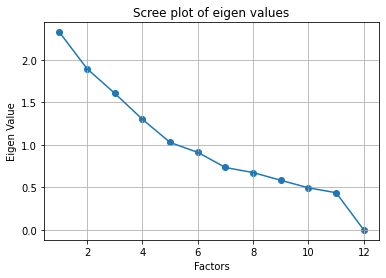

In [ ]:
#plotting the scree plot using matplotlib
plt.scatter(range(1,financial_df.shape[1]+1),ev)
plt.plot(range(1,financial_df.shape[1]+1),ev)
plt.title('Scree plot of eigen values')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()
#based on the scree plot the elbow joint is at the 5th point, beyond which will not be beneficial for 
#further component analysis

In [ ]:
#Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(financial_df,5,rotation='varimax')
fa.loadings
#based on the results Factor 1 has high factor loading for country and type of job
#Factor 2 has high factor loadings for respondent age,relationship with the head of the household,marital status and level of education
#factor 3 has high factor loadings for household size,type of location and marital status
#Factor 4 has high factor loadings for cellphone access, has a bank account and level of education
#Factor 5 has high factor loadings for year, level of educatioon and type of location

,Factor1,Factor2,Factor3,Factor4,Factor5
country,0.981307,0.071921,-0.020940,0.168981,0.004137
year,-0.014992,-0.008471,-0.055393,0.042151,0.525004
has_a_bank_account,0.093349,0.053921,0.013149,0.489809,0.202130
type_of_location,-0.055122,0.038638,0.424329,-0.016263,-0.349391
cell_phone_access,0.078474,-0.046097,0.154524,0.436019,-0.128653
household_size,-0.023740,-0.218763,0.586509,-0.007585,-0.068977
respondent_age,0.020280,0.597370,0.029485,-0.137954,0.009067
gender_of_respondent,0.094375,0.095805,-0.035642,0.232132,-0.041239
r/ship_with_head,0.105926,0.796421,-0.025906,0.175989,-0.037814
marital_status,0.025400,0.332538,0.659527,0.074494,0.040591


In [ ]:
#getting variance for each factors
fa.get_factor_variance()
#based on the results the cumulative variance is 48.43% explained by the five factors

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,1.966120,1.289931,1.002893,1.033728,0.519253
Proportion Var,0.163843,0.107494,0.083574,0.086144,0.043271
Cumulative Var,0.163843,0.271338,0.354912,0.441056,0.484327


### 6.1.3 Discriminant Analysis

In [ ]:
#splitting the variables into two just like in pca
X = financial_df.drop('has_a_bank_account',1)
y = financial_df['has_a_bank_account']

In [ ]:
#dividing the dataset into two
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.2,random_state =0)
#normalizing using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [ ]:
#specifying the n components as 1
#taking the output class as the discriminants
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#Using random forest to evaluate PCA
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth =0.2,random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#Evaluating performance using the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy is', accuracy_score(y_test,y_pred))
#from the accuracy obtained is 86.13% similar to that of PCA 
#the algorithm has predicted 16209 True positive, and 2610 false negatives

[[16209     0]
 [ 2610     0]]
Accuracy is 0.8613103778096605


#7. Conclusion and Recommendation


1.  Conclusion: According to the analysis having a bank account coincides with the level of education
2.   Recommendation: Exploring other factors retrieved from the respondents that will provide insights on the type of individual such as access to mobile phone,a likert scale on the usage of financial services  and ownership of assets

